In [14]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
import matplotlib.pyplot as plt


Data Loading

In [15]:
# === Load Data ===
df = pd.read_csv("traj.csv")  # or use your DataFrame directly

X = torch.tensor(df.iloc[:40000, :5].values, dtype=torch.float32)
y = torch.tensor(df.iloc[:40000, 5:].values, dtype=torch.float32)

dataset = TensorDataset(X, y)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_set, val_set = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_set, batch_size=32, shuffle=True)
val_loader = DataLoader(val_set, batch_size=32)

Model Definition

In [16]:
# === Behavioural Model ===
class Behavioural(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim)
        )

    def forward(self, x):
        return self.model(x)

Training Process

In [17]:
# === Training Function ===
lr = 0.001
num_epochs = 50
model = Behavioural(input_dim=5, hidden_dim=64, output_dim=2)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    epoch_train_loss = 0
    for xb, yb in train_loader:
        optimizer.zero_grad()
        pred = model(xb)
        loss = criterion(pred, yb)
        loss.backward()
        optimizer.step()
        epoch_train_loss += loss.item()
    train_losses.append(epoch_train_loss / len(train_loader))

    # Validation
    model.eval()
    epoch_val_loss = 0
    with torch.no_grad():
        for xb, yb in val_loader:
            pred = model(xb)
            val_loss = criterion(pred, yb)
            epoch_val_loss += val_loss.item()
    val_losses.append(epoch_val_loss / len(val_loader))

torch.save(model.state_dict(), 'Behavioural_model.pth')

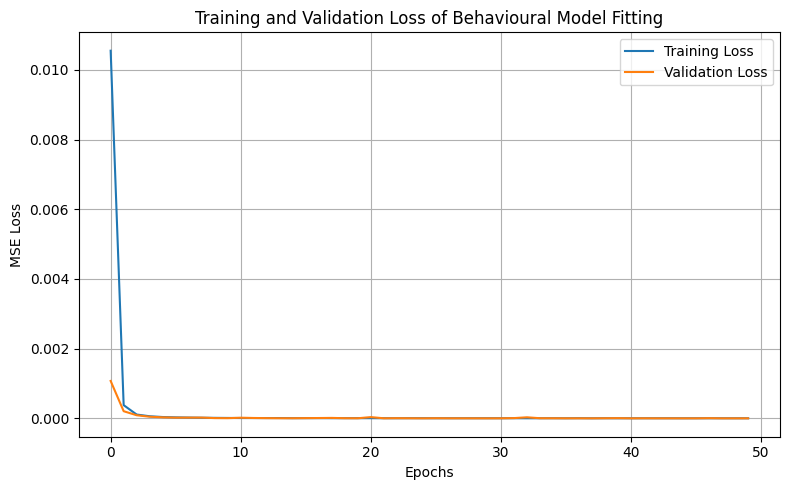

In [18]:

# === Plotting ===
plt.figure(figsize=(8, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Training and Validation Loss of Behavioural Model Fitting")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [19]:
plt.savefig('Behavioural_model_loss.png')

<Figure size 640x480 with 0 Axes>

Grid Search Result

In [ ]:
df_result = pd.read_csv("grid_search_results.csv")